In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
x= data.data

In [7]:
y = data.target

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
#Applying train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data.data,data.target,test_size=0.33)
N ,D =X_train.shape

In [14]:
# Scalling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
### Now creating the model

model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [16]:
# Compiling the model

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [18]:
r= model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 3s 7ms/sample - loss: 0.8656 - accuracy: 0.3963 - val_loss: 0.7494 - val_accuracy: 0.5585
Epoch 2/100
381/381 [==============================] - 0s 169us/sample - loss: 0.7741 - accuracy: 0.4751 - val_loss: 0.6677 - val_accuracy: 0.6170
Epoch 3/100
381/381 [==============================] - 0s 116us/sample - loss: 0.6929 - accuracy: 0.5801 - val_loss: 0.5975 - val_accuracy: 0.7394
Epoch 4/100
381/381 [==============================] - 0s 121us/sample - loss: 0.6231 - accuracy: 0.6719 - val_loss: 0.5378 - val_accuracy: 0.7819
Epoch 5/100
381/381 [==============================] - 0s 131us/sample - loss: 0.5648 - accuracy: 0.7533 - val_loss: 0.4867 - val_accuracy: 0.8298
Epoch 6/100
381/381 [==============================] - 0s 126us/sample - loss: 0.5156 - accuracy: 0.8110 - val_loss: 0.4431 - val_accuracy: 0.8564
Epoch 7/100
381/381 [==============================] - 0s 115us/sample - l

381/381 [==============================] - 0s 109us/sample - loss: 0.1405 - accuracy: 0.9738 - val_loss: 0.1135 - val_accuracy: 0.9574
Epoch 57/100
381/381 [==============================] - 0s 113us/sample - loss: 0.1394 - accuracy: 0.9738 - val_loss: 0.1124 - val_accuracy: 0.9574
Epoch 58/100
381/381 [==============================] - 0s 102us/sample - loss: 0.1382 - accuracy: 0.9738 - val_loss: 0.1114 - val_accuracy: 0.9574
Epoch 59/100
381/381 [==============================] - 0s 113us/sample - loss: 0.1370 - accuracy: 0.9738 - val_loss: 0.1104 - val_accuracy: 0.9574
Epoch 60/100
381/381 [==============================] - 0s 129us/sample - loss: 0.1359 - accuracy: 0.9764 - val_loss: 0.1094 - val_accuracy: 0.9574
Epoch 61/100
381/381 [==============================] - 0s 121us/sample - loss: 0.1348 - accuracy: 0.9764 - val_loss: 0.1085 - val_accuracy: 0.9574
Epoch 62/100
381/381 [==============================] - 0s 108us/sample - loss: 0.1337 - accuracy: 0.9764 - val_loss: 0.1076 

In [19]:
# train and test score
print("Train score",model.evaluate(X_train,Y_train))
print("Test score",model.evaluate(X_test,Y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train score [0.10712370927643589, 0.9816273]
188/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

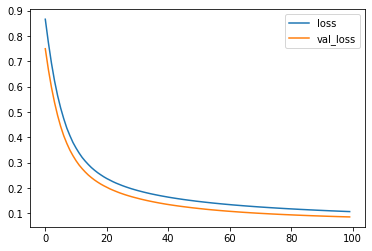

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()